In [1]:
import torch
from torch import nn

import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

torchvision.__version__, torch.__version__

('0.21.0', '2.6.0')

In [4]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

## Getting datasets

In [7]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    target_transform=None,
    download=True,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True
)

train_data, test_data

100%|██████████| 26.4M/26.4M [00:07<00:00, 3.45MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.88MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
img, label = train_data[0]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [17]:
img.shape, img.squeeze().shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

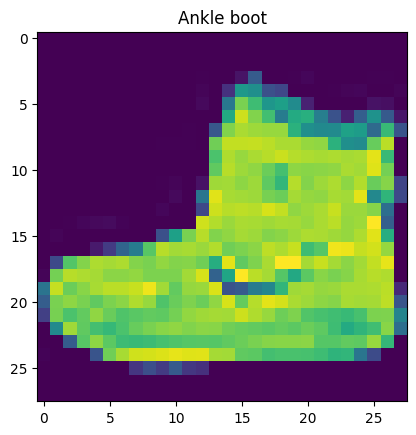

In [23]:
plt.imshow(img.squeeze())
plt.title(train_data.classes[label]);

In [20]:
train_data.classes, train_data.classes[label]

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 'Ankle boot')

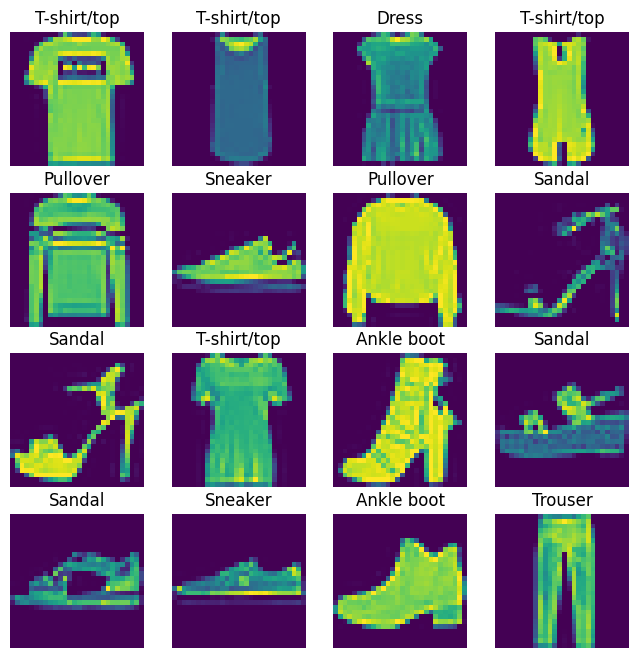

In [28]:
fig = plt.figure(figsize=(8, 8))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    data, label = train_data[i]
    plt.imshow(data.squeeze())
    plt.title(train_data.classes[label])
    plt.axis(False)

## Preparing DataLoader

In [29]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

In [30]:
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

train_dataloader

In [33]:
len(train_dataloader), len(test_dataloader), len(train_dataloader)*BATCH_SIZE

(1875, 313, 60000)

In [41]:
for i in train_dataloader:
    print(i[0].shape, i[1])

torch.Size([32, 1, 28, 28]) tensor([7, 9, 2, 5, 7, 4, 5, 3, 5, 9, 5, 1, 4, 1, 3, 2, 7, 8, 2, 6, 6, 3, 6, 3,
        8, 3, 4, 7, 9, 2, 8, 9])
torch.Size([32, 1, 28, 28]) tensor([0, 3, 3, 3, 1, 2, 3, 9, 2, 5, 3, 6, 1, 3, 2, 7, 3, 2, 0, 6, 5, 7, 7, 2,
        3, 4, 8, 7, 9, 2, 4, 7])
torch.Size([32, 1, 28, 28]) tensor([6, 8, 0, 8, 8, 6, 8, 3, 1, 4, 9, 8, 1, 6, 6, 6, 5, 4, 6, 2, 7, 4, 8, 7,
        8, 7, 4, 5, 6, 0, 5, 5])
torch.Size([32, 1, 28, 28]) tensor([9, 3, 8, 1, 5, 7, 1, 3, 8, 8, 5, 1, 0, 6, 8, 2, 0, 7, 0, 1, 9, 3, 1, 0,
        1, 2, 0, 2, 8, 8, 8, 4])
torch.Size([32, 1, 28, 28]) tensor([2, 4, 4, 8, 5, 3, 4, 8, 1, 9, 9, 5, 8, 6, 5, 1, 2, 1, 6, 1, 6, 3, 0, 6,
        3, 8, 0, 9, 0, 1, 1, 8])
torch.Size([32, 1, 28, 28]) tensor([1, 1, 6, 2, 2, 3, 9, 2, 9, 4, 6, 5, 7, 2, 9, 6, 0, 5, 8, 3, 7, 6, 6, 9,
        0, 5, 7, 4, 1, 4, 4, 1])
torch.Size([32, 1, 28, 28]) tensor([5, 7, 6, 6, 5, 9, 8, 9, 4, 4, 0, 8, 6, 9, 1, 8, 0, 8, 3, 4, 1, 3, 8, 1,
        0, 3, 8, 5, 7, 7, 1, 7])
torch.Size([3

In [43]:
train_batch1, train_label_batch1 = next(iter(train_dataloader))
train_batch1.shape, train_label_batch1

(torch.Size([32, 1, 28, 28]),
 tensor([5, 3, 5, 5, 9, 8, 6, 4, 7, 3, 9, 8, 0, 7, 8, 7, 5, 2, 0, 8, 8, 0, 8, 4,
         4, 7, 6, 9, 8, 5, 6, 4]))

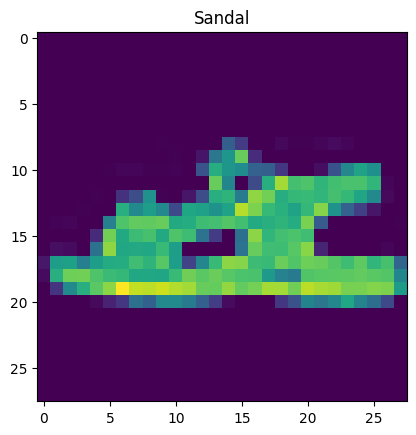

In [47]:
plt.imshow(train_batch1[0].squeeze())
plt.title(train_data.classes[train_label_batch1[0]])

plt.show()

## Building baseline model

In [49]:
flatten = nn.Flatten()

output = flatten(train_batch1[0])
train_batch1[0].shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [51]:
class FashionMNISTcpu(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=64),
            nn.Linear(in_features=64, out_features=256),
            nn.Linear(in_features=256, out_features=output_features)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layers(x)
    
model_cpu = FashionMNISTcpu(input_features=784, output_features=len(train_data.classes))
model_cpu, model_cpu.parameters(), model_cpu.state_dict(), next(model_cpu.parameters()).device

(FashionMNISTcpu(
   (layers): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=64, bias=True)
     (2): Linear(in_features=64, out_features=256, bias=True)
     (3): Linear(in_features=256, out_features=10, bias=True)
   )
 ),
 <generator object Module.parameters at 0x109159380>,
 OrderedDict([('layers.1.weight',
               tensor([[ 0.0351,  0.0150, -0.0038,  ..., -0.0129, -0.0062, -0.0132],
                       [-0.0319, -0.0032, -0.0276,  ...,  0.0019, -0.0246,  0.0253],
                       [ 0.0055, -0.0052,  0.0062,  ..., -0.0235, -0.0111, -0.0176],
                       ...,
                       [-0.0348, -0.0347,  0.0266,  ...,  0.0206, -0.0162,  0.0226],
                       [-0.0003, -0.0149,  0.0032,  ...,  0.0013,  0.0278,  0.0049],
                       [-0.0239,  0.0263,  0.0164,  ..., -0.0297,  0.0232, -0.0305]])),
              ('layers.1.bias',
               tensor([ 1.3364e-02,  2.8954e-02,  5.9027e-

In [54]:
# Total number of parameters
sum(p.numel() for p in model_cpu.parameters())

69450

In [55]:
# Total number of trainable parameters
sum(p.numel() for p in model_cpu.parameters() if p.requires_grad)

69450

In [56]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(), lr=1e-2)

loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [61]:
preds = torch.argmax(torch.softmax(model_cpu(train_batch1), dim=1), dim=1)
preds

tensor([6, 6, 6, 6, 0, 6, 0, 0, 6, 6, 0, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        0, 6, 6, 6, 6, 6, 6, 6])

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(preds, train_label_batch1)*100

6.25

In [64]:
%%time

# imorting tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 10
training_losses = []
training_epoch_loss = []
training_accuracies = []

test_losses = []
test_epoch_losses = []
test_epoch_accuracies = []
test_accuracies = []

for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()
        batch_output = model_cpu(X)
        batch_preds = torch.argmax(torch.softmax(batch_output, dim=1), dim=1)
        batch_loss = loss_fn(batch_output, y)

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += batch_loss

        if batch%200 == 0:
            training_losses.append(batch_loss.detach())
            batch_accuracy = accuracy_score(y, batch_preds)
            training_accuracies.append(batch_accuracy*100)
            print(f"Batch: {batch}, training loss: {batch_loss}, training accuracy: {batch_accuracy*100}")
    
    train_loss /= len(train_dataloader)
    training_epoch_loss.append(train_loss)

    test_loss = 0
    test_accuracy = 0

    model_cpu.eval()
    with torch.no_grad():
        for batch, (X, y) in enumerate(test_dataloader):
            test_output = model_cpu(X)
            test_preds = torch.argmax(torch.softmax(test_output, dim=1), dim=1)
            loss = loss_fn(test_output, y)
            test_loss += loss
            accuracy = accuracy_score(test_preds, y)
            test_accuracy += accuracy

            if batch%200 == 0:
                test_losses.append(loss.detach())
                test_accuracies.append(accuracy)
                print(f"Batch: {batch}, test loss: {loss}, test accuracy: {accuracy*100}")
        test_loss /= len(test_dataloader)
        test_epoch_losses.append(test_loss)
        test_accuracy /= len(test_dataloader)
        test_epoch_accuracies.append(test_accuracy)

len(training_losses), len(training_accuracies), len(test_losses), len(test_accuracies), len(training_epoch_loss), len(test_epoch_losses)

  0%|          | 0/10 [00:00<?, ?it/s]

Batch: 0, training loss: 2.3272764682769775, training accuracy: 6.25
Batch: 200, training loss: 1.2059475183486938, training accuracy: 62.5
Batch: 400, training loss: 0.8190208077430725, training accuracy: 68.75
Batch: 600, training loss: 0.7363542318344116, training accuracy: 75.0
Batch: 800, training loss: 0.8572025299072266, training accuracy: 56.25
Batch: 1000, training loss: 0.5538971424102783, training accuracy: 81.25
Batch: 1200, training loss: 0.4777894914150238, training accuracy: 84.375
Batch: 1400, training loss: 0.7960454225540161, training accuracy: 71.875
Batch: 1600, training loss: 0.49909135699272156, training accuracy: 87.5
Batch: 1800, training loss: 0.5970818400382996, training accuracy: 87.5
Batch: 0, test loss: 0.6445221900939941, test accuracy: 68.75


 10%|█         | 1/10 [00:02<00:19,  2.15s/it]

Batch: 200, test loss: 0.4388827383518219, test accuracy: 78.125
Batch: 0, training loss: 0.6685569882392883, training accuracy: 78.125
Batch: 200, training loss: 0.3719305694103241, training accuracy: 87.5
Batch: 400, training loss: 0.5734854340553284, training accuracy: 71.875
Batch: 600, training loss: 0.584057629108429, training accuracy: 71.875
Batch: 800, training loss: 0.45989206433296204, training accuracy: 84.375
Batch: 1000, training loss: 0.43138885498046875, training accuracy: 81.25
Batch: 1200, training loss: 0.4374668002128601, training accuracy: 84.375
Batch: 1400, training loss: 0.5127177238464355, training accuracy: 81.25
Batch: 1600, training loss: 0.49355751276016235, training accuracy: 78.125
Batch: 1800, training loss: 0.7262383103370667, training accuracy: 62.5
Batch: 0, test loss: 0.23808898031711578, test accuracy: 93.75


 20%|██        | 2/10 [00:04<00:16,  2.08s/it]

Batch: 200, test loss: 0.5141333937644958, test accuracy: 84.375
Batch: 0, training loss: 0.3901674151420593, training accuracy: 87.5
Batch: 200, training loss: 0.15052130818367004, training accuracy: 96.875
Batch: 400, training loss: 0.43407806754112244, training accuracy: 81.25
Batch: 600, training loss: 0.6278751492500305, training accuracy: 84.375
Batch: 800, training loss: 0.6228250861167908, training accuracy: 78.125
Batch: 1000, training loss: 0.5297303795814514, training accuracy: 81.25
Batch: 1200, training loss: 0.31120896339416504, training accuracy: 87.5
Batch: 1400, training loss: 0.5250941514968872, training accuracy: 78.125
Batch: 1600, training loss: 0.4643280506134033, training accuracy: 84.375
Batch: 1800, training loss: 0.26572927832603455, training accuracy: 87.5
Batch: 0, test loss: 0.295474648475647, test accuracy: 90.625
Batch: 200, test loss: 0.4516238272190094, test accuracy: 84.375


 30%|███       | 3/10 [00:06<00:14,  2.09s/it]

Batch: 0, training loss: 0.3240387439727783, training accuracy: 90.625
Batch: 200, training loss: 0.3821183443069458, training accuracy: 87.5
Batch: 400, training loss: 0.4738197326660156, training accuracy: 81.25
Batch: 600, training loss: 0.5971969962120056, training accuracy: 75.0
Batch: 800, training loss: 0.388358473777771, training accuracy: 87.5
Batch: 1000, training loss: 0.49073681235313416, training accuracy: 78.125
Batch: 1200, training loss: 0.388636976480484, training accuracy: 87.5
Batch: 1400, training loss: 0.3130140006542206, training accuracy: 87.5
Batch: 1600, training loss: 0.618618369102478, training accuracy: 87.5
Batch: 1800, training loss: 0.4407626986503601, training accuracy: 87.5
Batch: 0, test loss: 0.6933764219284058, test accuracy: 84.375
Batch: 200, test loss: 0.3192496597766876, test accuracy: 84.375


 40%|████      | 4/10 [00:08<00:12,  2.05s/it]

Batch: 0, training loss: 0.2902734577655792, training accuracy: 87.5
Batch: 200, training loss: 0.3935132324695587, training accuracy: 87.5
Batch: 400, training loss: 0.2761355936527252, training accuracy: 90.625
Batch: 600, training loss: 0.5020862221717834, training accuracy: 71.875
Batch: 800, training loss: 0.16715043783187866, training accuracy: 96.875
Batch: 1000, training loss: 0.3412902355194092, training accuracy: 90.625
Batch: 1200, training loss: 0.5727922320365906, training accuracy: 87.5
Batch: 1400, training loss: 0.5148927569389343, training accuracy: 78.125
Batch: 1600, training loss: 0.3430567681789398, training accuracy: 81.25
Batch: 1800, training loss: 0.5343092083930969, training accuracy: 87.5
Batch: 0, test loss: 0.33179935812950134, test accuracy: 84.375
Batch: 200, test loss: 0.5373985171318054, test accuracy: 84.375


 50%|█████     | 5/10 [00:10<00:10,  2.01s/it]

Batch: 0, training loss: 0.3750738203525543, training accuracy: 84.375
Batch: 200, training loss: 0.38945016264915466, training accuracy: 90.625
Batch: 400, training loss: 0.4254867136478424, training accuracy: 84.375
Batch: 600, training loss: 0.2779653072357178, training accuracy: 87.5
Batch: 800, training loss: 0.8667790293693542, training accuracy: 68.75
Batch: 1000, training loss: 0.24258694052696228, training accuracy: 93.75
Batch: 1200, training loss: 0.2713569104671478, training accuracy: 90.625
Batch: 1400, training loss: 0.5731039643287659, training accuracy: 78.125
Batch: 1600, training loss: 0.5496940612792969, training accuracy: 81.25
Batch: 1800, training loss: 0.25174081325531006, training accuracy: 87.5
Batch: 0, test loss: 0.3649967610836029, test accuracy: 84.375
Batch: 200, test loss: 0.3665352165699005, test accuracy: 87.5


 60%|██████    | 6/10 [00:12<00:07,  2.00s/it]

Batch: 0, training loss: 0.4447512924671173, training accuracy: 81.25
Batch: 200, training loss: 0.3966485261917114, training accuracy: 87.5
Batch: 400, training loss: 0.25852859020233154, training accuracy: 93.75
Batch: 600, training loss: 0.2966916263103485, training accuracy: 87.5
Batch: 800, training loss: 0.5294628143310547, training accuracy: 81.25
Batch: 1000, training loss: 0.25171953439712524, training accuracy: 93.75
Batch: 1200, training loss: 0.5545532703399658, training accuracy: 78.125
Batch: 1400, training loss: 0.49003514647483826, training accuracy: 81.25
Batch: 1600, training loss: 0.4370500147342682, training accuracy: 81.25
Batch: 1800, training loss: 0.28464654088020325, training accuracy: 87.5
Batch: 0, test loss: 0.4068091809749603, test accuracy: 81.25
Batch: 200, test loss: 0.3571746349334717, test accuracy: 84.375


 70%|███████   | 7/10 [00:14<00:05,  1.99s/it]

Batch: 0, training loss: 0.29078203439712524, training accuracy: 84.375
Batch: 200, training loss: 0.30976229906082153, training accuracy: 87.5
Batch: 400, training loss: 0.30550533533096313, training accuracy: 84.375
Batch: 600, training loss: 0.2520914673805237, training accuracy: 93.75
Batch: 800, training loss: 0.43216484785079956, training accuracy: 81.25
Batch: 1000, training loss: 0.560889482498169, training accuracy: 78.125
Batch: 1200, training loss: 0.3412797451019287, training accuracy: 87.5
Batch: 1400, training loss: 0.5867083072662354, training accuracy: 78.125
Batch: 1600, training loss: 0.4124039113521576, training accuracy: 84.375
Batch: 1800, training loss: 0.343127578496933, training accuracy: 84.375
Batch: 0, test loss: 0.1971840113401413, test accuracy: 93.75


 80%|████████  | 8/10 [00:16<00:04,  2.01s/it]

Batch: 200, test loss: 0.7956373691558838, test accuracy: 65.625
Batch: 0, training loss: 0.520542323589325, training accuracy: 84.375
Batch: 200, training loss: 0.29617565870285034, training accuracy: 90.625
Batch: 400, training loss: 0.3731764256954193, training accuracy: 84.375
Batch: 600, training loss: 0.86417555809021, training accuracy: 75.0
Batch: 800, training loss: 0.64360511302948, training accuracy: 81.25
Batch: 1000, training loss: 0.4488948881626129, training accuracy: 84.375
Batch: 1200, training loss: 0.23418419063091278, training accuracy: 96.875
Batch: 1400, training loss: 0.5249022245407104, training accuracy: 78.125
Batch: 1600, training loss: 0.3523811101913452, training accuracy: 84.375
Batch: 1800, training loss: 0.5813730359077454, training accuracy: 78.125
Batch: 0, test loss: 0.543746292591095, test accuracy: 84.375


 90%|█████████ | 9/10 [00:18<00:02,  2.01s/it]

Batch: 200, test loss: 0.3743477463722229, test accuracy: 81.25
Batch: 0, training loss: 0.4397197365760803, training accuracy: 81.25
Batch: 200, training loss: 0.5069327354431152, training accuracy: 84.375
Batch: 400, training loss: 0.42554885149002075, training accuracy: 90.625
Batch: 600, training loss: 0.573855459690094, training accuracy: 75.0
Batch: 800, training loss: 0.3081677556037903, training accuracy: 87.5
Batch: 1000, training loss: 0.40126821398735046, training accuracy: 84.375
Batch: 1200, training loss: 0.41460084915161133, training accuracy: 84.375
Batch: 1400, training loss: 0.2076137661933899, training accuracy: 93.75
Batch: 1600, training loss: 0.27872434258461, training accuracy: 87.5
Batch: 1800, training loss: 0.8808162808418274, training accuracy: 71.875
Batch: 0, test loss: 0.36380061507225037, test accuracy: 87.5


100%|██████████| 10/10 [00:20<00:00,  2.02s/it]

Batch: 200, test loss: 0.4201006591320038, test accuracy: 75.0
CPU times: user 1min 13s, sys: 5.57 s, total: 1min 18s
Wall time: 20.2 s


(100, 100, 20, 20, 10, 10)

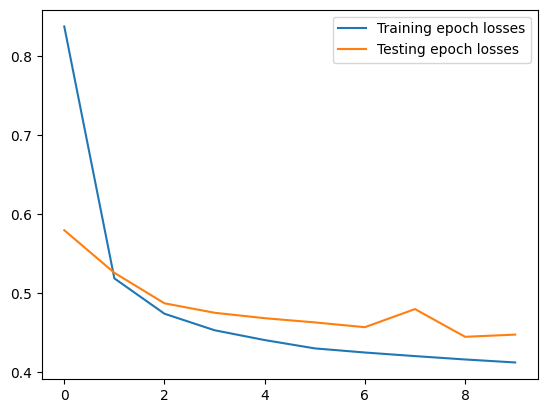

In [79]:
plt.plot([i.cpu().detach() for i in training_epoch_loss], label="Training epoch losses")
plt.plot([i.cpu().detach() for i in test_epoch_losses], label="Testing epoch losses")

plt.legend()
plt.show()

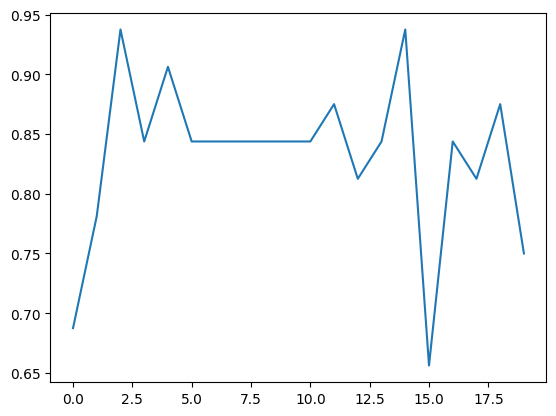

In [83]:
plt.plot(test_accuracies)
plt.show()

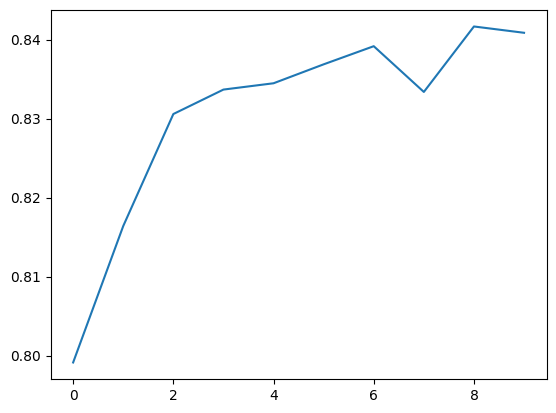

In [85]:
plt.plot(test_epoch_accuracies);

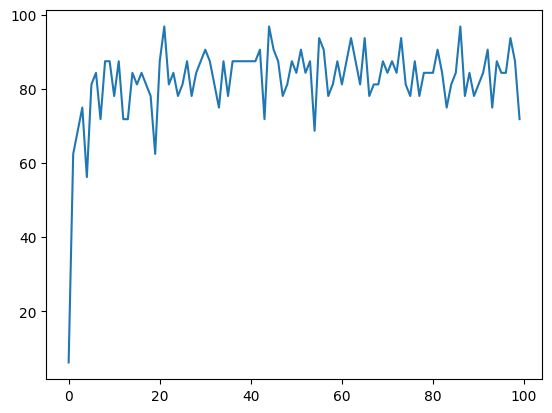

In [89]:
plt.plot(training_accuracies);

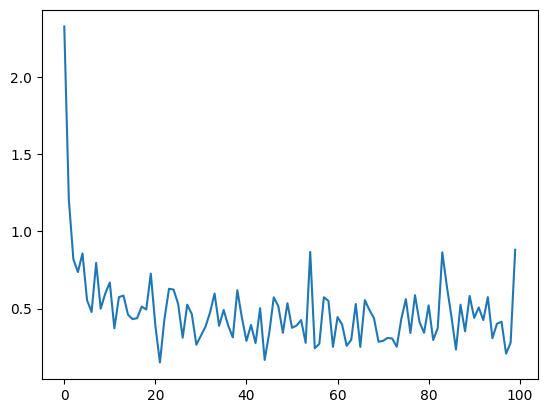

In [91]:
plt.plot(training_losses);

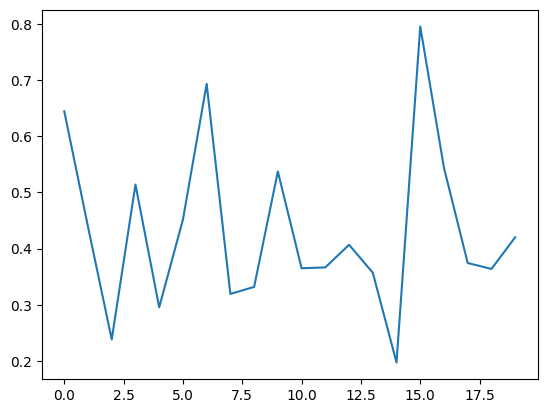

In [92]:
plt.plot(test_losses)

In [94]:
model_cpu.state_dict()

OrderedDict([('layers.1.weight',
              tensor([[ 0.0351,  0.0150, -0.0044,  ...,  0.0033,  0.0027, -0.0119],
                      [-0.0319, -0.0033, -0.0282,  ...,  0.0144, -0.0207,  0.0256],
                      [ 0.0055, -0.0052,  0.0059,  ..., -0.0098, -0.0033, -0.0161],
                      ...,
                      [-0.0348, -0.0347,  0.0255,  ...,  0.0245, -0.0120,  0.0230],
                      [-0.0003, -0.0148,  0.0032,  ...,  0.0107,  0.0314,  0.0062],
                      [-0.0238,  0.0265,  0.0177,  ..., -0.0331,  0.0210, -0.0301]])),
             ('layers.1.bias',
              tensor([-0.1224,  0.1970, -0.1145, -0.0186, -0.0460, -0.0598, -0.0848, -0.0571,
                      -0.0828,  0.0823,  0.1954, -0.0370, -0.0010,  0.0121, -0.0310, -0.0627,
                       0.0294,  0.0054, -0.0864, -0.2349, -0.0194, -0.0747,  0.0422,  0.0441,
                       0.0573, -0.0273, -0.0985, -0.0160, -0.0732, -0.2588,  0.1898,  0.1381,
                       0.1

In [98]:
model_cpu.eval()

loss, acc = 0, 0

with torch.inference_mode():
    for X, y in test_dataloader:
        output = model_cpu(X)
        preds = torch.argmax(torch.softmax(output, dim=1), dim=1)
        ls = loss_fn(output, y)
        ac = accuracy_score(preds, y)*100

        loss += ls
        acc += ac

    loss /= len(test_dataloader)
    acc /= len(test_dataloader)

loss, acc

(tensor(0.4481), 84.07547923322684)

**Observations:**

- Accuracy looks okay
- Training takes 20.2s on CPU

## Device agnostic code

- Model1: Non linear model
- Model2: CNN model

In [99]:
device

'mps'

In [123]:
class NonLinearModel(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=256),
            nn.Tanh(),
            nn.Linear(in_features=256, out_features=output_features)
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layers(x)
    
model_v1 = NonLinearModel(input_features=784, output_features=len(train_data.classes))
model_v1, model_v1.parameters(), model_v1.state_dict(), next(model_v1.parameters()).device

(NonLinearModel(
   (layers): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=64, bias=True)
     (2): ReLU()
     (3): Linear(in_features=64, out_features=256, bias=True)
     (4): Tanh()
     (5): Linear(in_features=256, out_features=10, bias=True)
   )
 ),
 <generator object Module.parameters at 0x154b49b60>,
 OrderedDict([('layers.1.weight',
               tensor([[-0.0078,  0.0072, -0.0174,  ..., -0.0354,  0.0187,  0.0085],
                       [-0.0182,  0.0344, -0.0162,  ...,  0.0017,  0.0045,  0.0133],
                       [-0.0108, -0.0213,  0.0084,  ...,  0.0273, -0.0081,  0.0026],
                       ...,
                       [-0.0007, -0.0242, -0.0168,  ..., -0.0045,  0.0321, -0.0302],
                       [-0.0276,  0.0083, -0.0225,  ..., -0.0262,  0.0271, -0.0105],
                       [-0.0055, -0.0008,  0.0161,  ..., -0.0329,  0.0038,  0.0333]])),
              ('layers.1.bias',
               tensor([ 0

In [124]:
sum(torch.numel(i) for i in model_v1.parameters()), sum(i.numel() for i in model_v1.parameters() if i.requires_grad)

(69450, 69450)

In [125]:
model_v1.to(device=device)

next(model_v1.parameters()).device

device(type='mps', index=0)

In [126]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(), lr=1e-2)

loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [127]:
def train_step(dataLoader, model, loss_fn, optimizer, accuracy_fn, device):
    train_losses = []
    train_accuracies = []

    epoch_loss = 0
    epoch_acc = 0

    model.train()
    for batch, (X, y) in enumerate(dataLoader):
        X = X.to(device=device)
        y = y.to(device=device)

        output = model(X)
        preds = torch.argmax(torch.softmax(output, dim=1), dim=1)

        loss = loss_fn(output, y)
        epoch_loss += loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        accuracy = accuracy_fn(preds.cpu(), y.cpu())
        epoch_acc += accuracy

        if batch%200==0:
            train_losses.append(loss.cpu().detach())
            train_accuracies.append(accuracy)
            print(f"Batch: {batch}, Train loss: {loss}, Train accuracy: {accuracy}")
    
    epoch_loss /= len(dataLoader)
    epoch_acc /= len(dataLoader)
    
    return train_losses, train_accuracies, epoch_loss, epoch_acc

In [128]:
def test_step(dataLoader, model, loss_fn, accuracy_fn, device):
    test_losses = []
    test_accuracies = []

    epoch_loss = 0
    epoch_acc = 0

    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataLoader):
            X, y = X.to(device=device), y.to(device=device)

            output = model(X)
            preds = torch.argmax(torch.softmax(output, dim=1), dim=1)

            loss = loss_fn(output, y)
            acc = accuracy_fn(preds.cpu(), y.cpu())

            epoch_loss += loss
            epoch_acc += acc

            if batch%50==0:
                test_losses.append(loss.cpu().detach())
                test_accuracies.append(acc)
                print(f"Batch: {batch}, Test loss: {loss}, Test accuracy: {acc}")

        epoch_loss /= len(dataLoader)
        epoch_acc /= len(dataLoader)

    return test_losses, test_accuracies, epoch_loss, epoch_acc

In [129]:
%%time

from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 10

training_epoch_loss_v1 = []
training_epoch_acc_v1 = []

testing_epoch_loss_v1 = []
testing_epoch_acc_v1 = []

training_losses_v1 = []
training_accuracies_v1 = []

test_losses_v1 = []
test_accuracies_v1 = []

for epoch in tqdm(range(epochs)):

    train_losses_ep, train_accuracies_ep, epoch_loss1, epoch_acc1 = train_step(dataLoader=train_dataloader, model=model_v1, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_score, device=device)

    training_epoch_loss_v1.append(epoch_loss1)
    training_epoch_acc_v1.append(epoch_acc1)

    training_losses_v1 += train_losses_ep
    training_accuracies_v1 += train_accuracies_ep

    test_losses_ep, test_accuracies_ep, epoch_loss_test1, epoch_acc_test1 = test_step(dataLoader=test_dataloader, model=model_v1, loss_fn=loss_fn, accuracy_fn=accuracy_score, device=device)

    testing_epoch_loss_v1.append(epoch_loss_test1)
    testing_epoch_acc_v1.append(epoch_acc_test1)

    test_losses_v1 += test_losses_ep
    test_accuracies_v1 += test_accuracies_ep

  0%|          | 0/10 [00:00<?, ?it/s]

Batch: 0, Train loss: 2.304514169692993, Train accuracy: 0.09375
Batch: 200, Train loss: 1.6189236640930176, Train accuracy: 0.59375
Batch: 400, Train loss: 1.0384410619735718, Train accuracy: 0.6875
Batch: 600, Train loss: 0.8431018590927124, Train accuracy: 0.71875
Batch: 800, Train loss: 0.9207593202590942, Train accuracy: 0.5625
Batch: 1000, Train loss: 0.6402511596679688, Train accuracy: 0.8125
Batch: 1200, Train loss: 0.557296872138977, Train accuracy: 0.84375
Batch: 1400, Train loss: 0.8848043084144592, Train accuracy: 0.65625
Batch: 1600, Train loss: 0.551935613155365, Train accuracy: 0.8125
Batch: 1800, Train loss: 0.6387100219726562, Train accuracy: 0.8125
Batch: 0, Test loss: 0.6762840747833252, Test accuracy: 0.71875
Batch: 50, Test loss: 0.6227258443832397, Test accuracy: 0.75
Batch: 100, Test loss: 0.661505401134491, Test accuracy: 0.71875
Batch: 150, Test loss: 0.5266225337982178, Test accuracy: 0.8125
Batch: 200, Test loss: 0.44323915243148804, Test accuracy: 0.875
Batc

 10%|█         | 1/10 [00:05<00:51,  5.67s/it]

Batch: 0, Train loss: 0.703925609588623, Train accuracy: 0.71875
Batch: 200, Train loss: 0.38739174604415894, Train accuracy: 0.84375
Batch: 400, Train loss: 0.5940938591957092, Train accuracy: 0.71875
Batch: 600, Train loss: 0.576694130897522, Train accuracy: 0.8125
Batch: 800, Train loss: 0.45863741636276245, Train accuracy: 0.84375
Batch: 1000, Train loss: 0.4503454566001892, Train accuracy: 0.84375
Batch: 1200, Train loss: 0.4763520359992981, Train accuracy: 0.84375
Batch: 1400, Train loss: 0.5299885869026184, Train accuracy: 0.78125
Batch: 1600, Train loss: 0.4914937913417816, Train accuracy: 0.78125
Batch: 1800, Train loss: 0.7690384387969971, Train accuracy: 0.625
Batch: 0, Test loss: 0.26915720105171204, Test accuracy: 0.9375
Batch: 50, Test loss: 0.3968410789966583, Test accuracy: 0.84375
Batch: 100, Test loss: 0.459897518157959, Test accuracy: 0.8125
Batch: 150, Test loss: 0.608830451965332, Test accuracy: 0.75
Batch: 200, Test loss: 0.5657196640968323, Test accuracy: 0.78125

 20%|██        | 2/10 [00:11<00:45,  5.72s/it]

Batch: 250, Test loss: 0.5213534235954285, Test accuracy: 0.8125
Batch: 300, Test loss: 0.3631599545478821, Test accuracy: 0.875
Batch: 0, Train loss: 0.3768114447593689, Train accuracy: 0.90625
Batch: 200, Train loss: 0.17585229873657227, Train accuracy: 0.96875
Batch: 400, Train loss: 0.42226719856262207, Train accuracy: 0.8125
Batch: 600, Train loss: 0.6464178562164307, Train accuracy: 0.8125
Batch: 800, Train loss: 0.5838815569877625, Train accuracy: 0.78125
Batch: 1000, Train loss: 0.5165694355964661, Train accuracy: 0.78125
Batch: 1200, Train loss: 0.3141323924064636, Train accuracy: 0.90625
Batch: 1400, Train loss: 0.4914885461330414, Train accuracy: 0.78125
Batch: 1600, Train loss: 0.44288378953933716, Train accuracy: 0.84375
Batch: 1800, Train loss: 0.2695131301879883, Train accuracy: 0.875
Batch: 0, Test loss: 0.28451091051101685, Test accuracy: 0.90625
Batch: 50, Test loss: 0.5606275200843811, Test accuracy: 0.8125
Batch: 100, Test loss: 0.613267183303833, Test accuracy: 0.7

 30%|███       | 3/10 [00:17<00:40,  5.75s/it]

Batch: 0, Train loss: 0.3275757431983948, Train accuracy: 0.875
Batch: 200, Train loss: 0.3887750208377838, Train accuracy: 0.8125
Batch: 400, Train loss: 0.493847519159317, Train accuracy: 0.75
Batch: 600, Train loss: 0.5631779432296753, Train accuracy: 0.75
Batch: 800, Train loss: 0.3477867543697357, Train accuracy: 0.875
Batch: 1000, Train loss: 0.49056071043014526, Train accuracy: 0.75
Batch: 1200, Train loss: 0.3874167799949646, Train accuracy: 0.875
Batch: 1400, Train loss: 0.3150666356086731, Train accuracy: 0.90625
Batch: 1600, Train loss: 0.5921569466590881, Train accuracy: 0.84375
Batch: 1800, Train loss: 0.4535749554634094, Train accuracy: 0.84375
Batch: 0, Test loss: 0.6304019689559937, Test accuracy: 0.84375
Batch: 50, Test loss: 0.2139347791671753, Test accuracy: 0.90625
Batch: 100, Test loss: 0.5983477830886841, Test accuracy: 0.78125
Batch: 150, Test loss: 0.6934210062026978, Test accuracy: 0.78125
Batch: 200, Test loss: 0.306018590927124, Test accuracy: 0.90625


 40%|████      | 4/10 [00:22<00:34,  5.75s/it]

Batch: 250, Test loss: 0.2537708878517151, Test accuracy: 0.90625
Batch: 300, Test loss: 0.3471775949001312, Test accuracy: 0.96875
Batch: 0, Train loss: 0.30123019218444824, Train accuracy: 0.90625
Batch: 200, Train loss: 0.3807009160518646, Train accuracy: 0.875
Batch: 400, Train loss: 0.26724350452423096, Train accuracy: 0.9375
Batch: 600, Train loss: 0.5180042386054993, Train accuracy: 0.78125
Batch: 800, Train loss: 0.15814894437789917, Train accuracy: 0.96875
Batch: 1000, Train loss: 0.3583396077156067, Train accuracy: 0.875
Batch: 1200, Train loss: 0.5118297934532166, Train accuracy: 0.875
Batch: 1400, Train loss: 0.47640466690063477, Train accuracy: 0.8125
Batch: 1600, Train loss: 0.3760550618171692, Train accuracy: 0.875
Batch: 1800, Train loss: 0.4559541344642639, Train accuracy: 0.90625
Batch: 0, Test loss: 0.3314768075942993, Test accuracy: 0.84375
Batch: 50, Test loss: 0.3091150224208832, Test accuracy: 0.875
Batch: 100, Test loss: 0.41933825612068176, Test accuracy: 0.906

 50%|█████     | 5/10 [00:28<00:28,  5.77s/it]

Batch: 250, Test loss: 0.44400304555892944, Test accuracy: 0.78125
Batch: 300, Test loss: 0.2325327843427658, Test accuracy: 0.9375
Batch: 0, Train loss: 0.3661561608314514, Train accuracy: 0.90625
Batch: 200, Train loss: 0.37801593542099, Train accuracy: 0.875
Batch: 400, Train loss: 0.3981918692588806, Train accuracy: 0.8125
Batch: 600, Train loss: 0.2474280297756195, Train accuracy: 0.84375
Batch: 800, Train loss: 0.7720744609832764, Train accuracy: 0.6875
Batch: 1000, Train loss: 0.23116019368171692, Train accuracy: 0.90625
Batch: 1200, Train loss: 0.21187889575958252, Train accuracy: 0.90625
Batch: 1400, Train loss: 0.5130667686462402, Train accuracy: 0.8125
Batch: 1600, Train loss: 0.5588305592536926, Train accuracy: 0.78125
Batch: 1800, Train loss: 0.23535190522670746, Train accuracy: 0.875
Batch: 0, Test loss: 0.3258746266365051, Test accuracy: 0.8125
Batch: 50, Test loss: 0.32718491554260254, Test accuracy: 0.875
Batch: 100, Test loss: 0.3207447826862335, Test accuracy: 0.8125

 60%|██████    | 6/10 [00:34<00:23,  5.78s/it]

Batch: 300, Test loss: 0.5981868505477905, Test accuracy: 0.8125
Batch: 0, Train loss: 0.3885089159011841, Train accuracy: 0.84375
Batch: 200, Train loss: 0.38892295956611633, Train accuracy: 0.875
Batch: 400, Train loss: 0.28696948289871216, Train accuracy: 0.9375
Batch: 600, Train loss: 0.2875598669052124, Train accuracy: 0.90625
Batch: 800, Train loss: 0.4584626853466034, Train accuracy: 0.84375
Batch: 1000, Train loss: 0.22463861107826233, Train accuracy: 0.9375
Batch: 1200, Train loss: 0.5635176301002502, Train accuracy: 0.84375
Batch: 1400, Train loss: 0.4702017903327942, Train accuracy: 0.8125
Batch: 1600, Train loss: 0.42026498913764954, Train accuracy: 0.84375
Batch: 1800, Train loss: 0.288898229598999, Train accuracy: 0.875
Batch: 0, Test loss: 0.35254770517349243, Test accuracy: 0.84375
Batch: 50, Test loss: 0.35370147228240967, Test accuracy: 0.84375
Batch: 100, Test loss: 0.6809777021408081, Test accuracy: 0.78125
Batch: 150, Test loss: 0.6334086656570435, Test accuracy: 0

 70%|███████   | 7/10 [00:40<00:17,  5.79s/it]

Batch: 250, Test loss: 0.2755105495452881, Test accuracy: 0.875
Batch: 300, Test loss: 0.23549814522266388, Test accuracy: 0.9375
Batch: 0, Train loss: 0.29321175813674927, Train accuracy: 0.84375
Batch: 200, Train loss: 0.28428158164024353, Train accuracy: 0.90625
Batch: 400, Train loss: 0.28026074171066284, Train accuracy: 0.875
Batch: 600, Train loss: 0.25291305780410767, Train accuracy: 0.9375
Batch: 800, Train loss: 0.40065670013427734, Train accuracy: 0.875
Batch: 1000, Train loss: 0.49686092138290405, Train accuracy: 0.78125
Batch: 1200, Train loss: 0.353890061378479, Train accuracy: 0.875
Batch: 1400, Train loss: 0.5493313074111938, Train accuracy: 0.8125
Batch: 1600, Train loss: 0.3887169063091278, Train accuracy: 0.84375
Batch: 1800, Train loss: 0.3035847544670105, Train accuracy: 0.875
Batch: 0, Test loss: 0.1797579824924469, Test accuracy: 0.9375
Batch: 50, Test loss: 0.7720820903778076, Test accuracy: 0.75
Batch: 100, Test loss: 0.3020222783088684, Test accuracy: 0.875
Bat

 80%|████████  | 8/10 [00:46<00:11,  5.80s/it]

Batch: 250, Test loss: 0.22104425728321075, Test accuracy: 0.90625
Batch: 300, Test loss: 0.4000491201877594, Test accuracy: 0.84375
Batch: 0, Train loss: 0.4489068388938904, Train accuracy: 0.78125
Batch: 200, Train loss: 0.25552964210510254, Train accuracy: 0.90625
Batch: 400, Train loss: 0.37356841564178467, Train accuracy: 0.875
Batch: 600, Train loss: 0.7960883378982544, Train accuracy: 0.78125
Batch: 800, Train loss: 0.542656660079956, Train accuracy: 0.8125
Batch: 1000, Train loss: 0.3850468397140503, Train accuracy: 0.875
Batch: 1200, Train loss: 0.1814609318971634, Train accuracy: 0.96875
Batch: 1400, Train loss: 0.4690658748149872, Train accuracy: 0.8125
Batch: 1600, Train loss: 0.3742685317993164, Train accuracy: 0.84375
Batch: 1800, Train loss: 0.46606773138046265, Train accuracy: 0.8125
Batch: 0, Test loss: 0.5126543045043945, Test accuracy: 0.84375
Batch: 50, Test loss: 0.5483655333518982, Test accuracy: 0.75
Batch: 100, Test loss: 0.860695481300354, Test accuracy: 0.75
B

 90%|█████████ | 9/10 [00:51<00:05,  5.79s/it]

Batch: 250, Test loss: 0.18317832052707672, Test accuracy: 0.96875
Batch: 300, Test loss: 0.45702746510505676, Test accuracy: 0.90625
Batch: 0, Train loss: 0.44340306520462036, Train accuracy: 0.84375
Batch: 200, Train loss: 0.43062227964401245, Train accuracy: 0.90625
Batch: 400, Train loss: 0.4271191358566284, Train accuracy: 0.875
Batch: 600, Train loss: 0.5515174865722656, Train accuracy: 0.78125
Batch: 800, Train loss: 0.26030924916267395, Train accuracy: 0.90625
Batch: 1000, Train loss: 0.34917116165161133, Train accuracy: 0.84375
Batch: 1200, Train loss: 0.44656118750572205, Train accuracy: 0.875
Batch: 1400, Train loss: 0.1876603215932846, Train accuracy: 0.96875
Batch: 1600, Train loss: 0.28169500827789307, Train accuracy: 0.9375
Batch: 1800, Train loss: 0.8743823766708374, Train accuracy: 0.71875
Batch: 0, Test loss: 0.3602426052093506, Test accuracy: 0.84375
Batch: 50, Test loss: 0.41339439153671265, Test accuracy: 0.875
Batch: 100, Test loss: 0.3412667214870453, Test accura

100%|██████████| 10/10 [00:57<00:00,  5.77s/it]

CPU times: user 45.6 s, sys: 8.28 s, total: 53.9 s
Wall time: 57.7 s


In [131]:
model_v1.eval()

loss_v1, acc_v1 = 0, 0

with torch.inference_mode():
    for X, y in test_dataloader:
        X = X.to(device=device)
        y = y.to(device=device)

        output = model_v1(X)
        preds = torch.argmax(torch.softmax(output, dim=1), dim=1)
        ls = loss_fn(output, y)
        ac = accuracy_score(preds.cpu(), y.cpu())*100

        loss_v1 += ls
        acc_v1 += ac

    loss_v1 /= len(test_dataloader)
    acc_v1 /= len(test_dataloader)

loss_v1, acc_v1

(tensor(0.4041, device='mps:0'), 85.47324281150159)

**Observation:**

- Minimal accuracy improvement
- Model took longer time on MPS: because gpu/mps is better for larger datasets and it takes time to transfer data to gpu due to which time taken for smaller datasets is more.

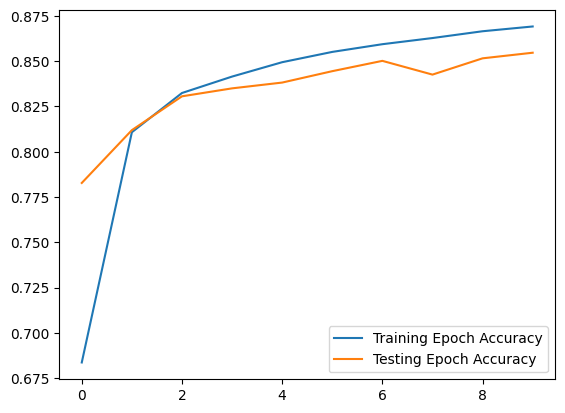

In [141]:
plt.plot(training_epoch_acc_v1, label="Training Epoch Accuracy")
plt.plot(testing_epoch_acc_v1, label="Testing Epoch Accuracy")

plt.legend()
plt.show()

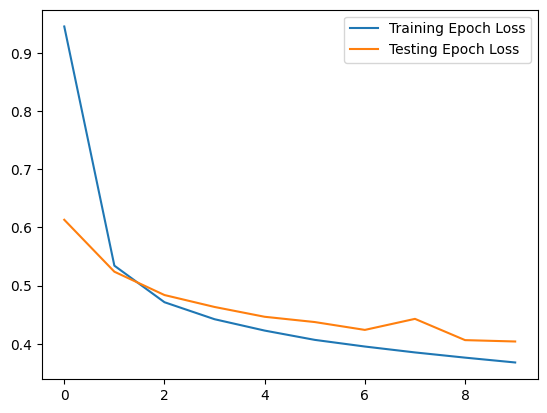

In [149]:
plt.plot([i.cpu().detach() for i in training_epoch_loss_v1], label="Training Epoch Loss")
plt.plot([i.cpu().detach() for i in testing_epoch_loss_v1], label="Testing Epoch Loss")

plt.legend()
plt.show()

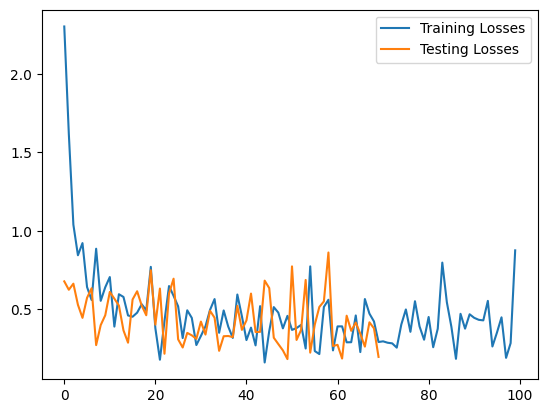

In [137]:
plt.plot(training_losses_v1, label="Training Losses")
plt.plot(test_losses_v1, label="Testing Losses")

plt.legend()
plt.show()

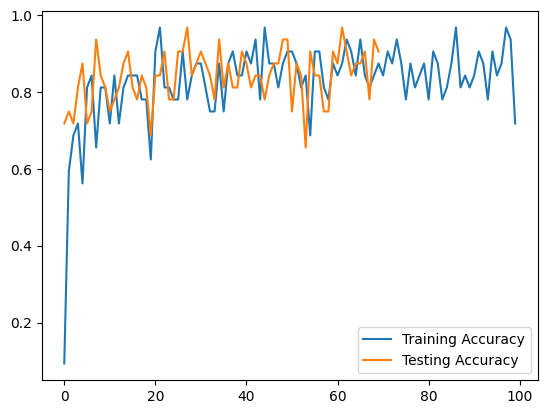

In [139]:
plt.plot(training_accuracies_v1, label="Training Accuracy")
plt.plot(test_accuracies_v1, label="Testing Accuracy")

plt.legend()
plt.show()

## CNN Models

In [183]:
class CNNModel(nn.Module):
    def __init__(self, input_shape, hidden_layer, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_layer, padding=1, stride=1, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layer, out_channels=output_shape, padding=1, stride=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_layer, hidden_layer, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_layer, hidden_layer, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layer*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
    
model_v2 = CNNModel(input_shape=1, hidden_layer=10, output_shape=len(train_data.classes))
model_v2

CNNModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [184]:
sum(torch.numel(i) for i in model_v2.parameters()), sum(torch.numel(i) for i in model_v2.parameters() if i.requires_grad)

(7740, 7740)

In [185]:
model_v2.state_dict(), next(model_v2.parameters()).device

(OrderedDict([('block_1.0.weight',
               tensor([[[[ 0.2277, -0.0021, -0.1009],
                         [-0.0552, -0.2641,  0.0811],
                         [-0.2973,  0.2075,  0.2574]]],
               
               
                       [[[-0.2930, -0.1858, -0.2993],
                         [ 0.2017,  0.2999,  0.1562],
                         [-0.2311,  0.0693,  0.2040]]],
               
               
                       [[[ 0.1624, -0.1150, -0.2510],
                         [-0.0320, -0.0900,  0.1439],
                         [ 0.1053,  0.3150, -0.0565]]],
               
               
                       [[[-0.1202, -0.2032,  0.3034],
                         [-0.0417,  0.2758,  0.0336],
                         [-0.0179,  0.3260, -0.1948]]],
               
               
                       [[[-0.1382, -0.1701, -0.1720],
                         [-0.2393, -0.0566, -0.0397],
                         [ 0.0622, -0.3207,  0.2529]]],
               
 

In [186]:
model_v2.to(device=device)
next(model_v2.parameters()).device

device(type='mps', index=0)

In [187]:
images = torch.rand(size=(32, 3, 28, 28))
test_img = images[0]

images.shape, test_img.shape

(torch.Size([32, 3, 28, 28]), torch.Size([3, 28, 28]))

In [188]:
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=1
)

otp = conv_layer(images)
otp1 = conv_layer(test_img)
otp.shape, otp1.shape, otp

(torch.Size([32, 10, 28, 28]),
 torch.Size([10, 28, 28]),
 tensor([[[[-2.7710e-01, -6.8490e-02, -2.1637e-01,  ..., -3.4284e-01,
            -1.6296e-01, -2.8776e-01],
           [-4.0238e-01, -4.0761e-01, -4.9613e-01,  ..., -5.0046e-01,
            -2.9103e-01, -1.1325e-01],
           [-3.1880e-01, -4.4178e-01, -3.8222e-01,  ..., -4.0415e-01,
            -2.9585e-01, -2.8177e-02],
           ...,
           [-3.2131e-01, -5.3619e-01, -7.7102e-02,  ..., -5.2408e-01,
            -3.2573e-01, -2.0656e-01],
           [-4.3942e-01, -5.3384e-01, -1.1306e-01,  ..., -3.6194e-01,
            -5.0543e-01, -2.1142e-01],
           [-2.7716e-01, -2.8530e-01, -3.1820e-01,  ..., -1.7323e-01,
            -5.7599e-01,  1.1402e-01]],
 
          [[ 4.8224e-01,  4.8829e-01,  5.8112e-01,  ...,  6.0916e-01,
             5.1323e-01,  3.4361e-01],
           [ 3.1760e-01,  4.9767e-01,  3.8827e-01,  ...,  5.0984e-01,
             4.8651e-01,  2.4054e-01],
           [ 2.4470e-01,  2.9294e-01,  5.1636e-01, 

In [189]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v2.parameters(), lr=1e-2)

loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [190]:
%%time

from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 10

training_epoch_loss_v2 = []
training_epoch_acc_v2 = []

testing_epoch_loss_v2 = []
testing_epoch_acc_v2 = []

training_losses_v2 = []
training_accuracies_v2 = []

test_losses_v2 = []
test_accuracies_v2 = []

for epoch in tqdm(range(epochs)):

    train_losses_ep, train_accuracies_ep, epoch_loss2, epoch_acc2 = train_step(dataLoader=train_dataloader, model=model_v2, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_score, device=device)

    training_epoch_loss_v2.append(epoch_loss2)
    training_epoch_acc_v2.append(epoch_acc2)

    training_losses_v2 += train_losses_ep
    training_accuracies_v2 += train_accuracies_ep

    test_losses_ep, test_accuracies_ep, epoch_loss_test2, epoch_acc_test2 = test_step(dataLoader=test_dataloader, model=model_v2, loss_fn=loss_fn, accuracy_fn=accuracy_score, device=device)

    testing_epoch_loss_v2.append(epoch_loss_test2)
    testing_epoch_acc_v2.append(epoch_acc_test2)

    test_losses_v2 += test_losses_ep
    test_accuracies_v2 += test_accuracies_ep

  0%|          | 0/10 [00:00<?, ?it/s]

Batch: 0, Train loss: 2.3058550357818604, Train accuracy: 0.09375
Batch: 200, Train loss: 2.2950572967529297, Train accuracy: 0.125
Batch: 400, Train loss: 2.2874062061309814, Train accuracy: 0.28125
Batch: 600, Train loss: 2.231959819793701, Train accuracy: 0.28125
Batch: 800, Train loss: 1.1705281734466553, Train accuracy: 0.59375
Batch: 1000, Train loss: 0.6970616579055786, Train accuracy: 0.71875
Batch: 1200, Train loss: 0.6244771480560303, Train accuracy: 0.8125
Batch: 1400, Train loss: 0.9181874394416809, Train accuracy: 0.6875
Batch: 1600, Train loss: 0.5560276508331299, Train accuracy: 0.78125
Batch: 1800, Train loss: 0.6239171028137207, Train accuracy: 0.78125
Batch: 0, Test loss: 0.5706671476364136, Test accuracy: 0.75
Batch: 50, Test loss: 0.6728739738464355, Test accuracy: 0.75
Batch: 100, Test loss: 0.7274835705757141, Test accuracy: 0.6875
Batch: 150, Test loss: 0.5576144456863403, Test accuracy: 0.8125
Batch: 200, Test loss: 0.4337688386440277, Test accuracy: 0.84375
Bat

 10%|█         | 1/10 [00:11<01:40, 11.14s/it]

Batch: 300, Test loss: 0.6654672622680664, Test accuracy: 0.78125
Batch: 0, Train loss: 0.7638543844223022, Train accuracy: 0.6875
Batch: 200, Train loss: 0.4422264099121094, Train accuracy: 0.8125
Batch: 400, Train loss: 0.6637201309204102, Train accuracy: 0.71875
Batch: 600, Train loss: 0.6958437561988831, Train accuracy: 0.75
Batch: 800, Train loss: 0.46322792768478394, Train accuracy: 0.75
Batch: 1000, Train loss: 0.6015316843986511, Train accuracy: 0.6875
Batch: 1200, Train loss: 0.4896825850009918, Train accuracy: 0.84375
Batch: 1400, Train loss: 0.4679540991783142, Train accuracy: 0.78125
Batch: 1600, Train loss: 0.37740904092788696, Train accuracy: 0.875
Batch: 1800, Train loss: 0.6620688438415527, Train accuracy: 0.6875
Batch: 0, Test loss: 0.23686283826828003, Test accuracy: 0.96875
Batch: 50, Test loss: 0.5626678466796875, Test accuracy: 0.78125
Batch: 100, Test loss: 0.40368273854255676, Test accuracy: 0.78125
Batch: 150, Test loss: 0.5562445521354675, Test accuracy: 0.7812

 20%|██        | 2/10 [00:21<01:24, 10.57s/it]

Batch: 300, Test loss: 0.32223862409591675, Test accuracy: 0.875
Batch: 0, Train loss: 0.3026611804962158, Train accuracy: 0.90625
Batch: 200, Train loss: 0.181052565574646, Train accuracy: 0.9375
Batch: 400, Train loss: 0.47457653284072876, Train accuracy: 0.75
Batch: 600, Train loss: 0.7016082406044006, Train accuracy: 0.78125
Batch: 800, Train loss: 0.683441698551178, Train accuracy: 0.78125
Batch: 1000, Train loss: 0.6472924947738647, Train accuracy: 0.75
Batch: 1200, Train loss: 0.3310670256614685, Train accuracy: 0.9375
Batch: 1400, Train loss: 0.5407615900039673, Train accuracy: 0.8125
Batch: 1600, Train loss: 0.46131041646003723, Train accuracy: 0.8125
Batch: 1800, Train loss: 0.21860721707344055, Train accuracy: 0.90625
Batch: 0, Test loss: 0.25624552369117737, Test accuracy: 0.9375
Batch: 50, Test loss: 0.44480451941490173, Test accuracy: 0.78125
Batch: 100, Test loss: 0.5456119775772095, Test accuracy: 0.84375
Batch: 150, Test loss: 0.4402727484703064, Test accuracy: 0.84375

 30%|███       | 3/10 [00:32<01:14, 10.70s/it]

Batch: 300, Test loss: 0.2425103783607483, Test accuracy: 0.96875
Batch: 0, Train loss: 0.30257129669189453, Train accuracy: 0.90625
Batch: 200, Train loss: 0.3903888165950775, Train accuracy: 0.875
Batch: 400, Train loss: 0.28152379393577576, Train accuracy: 0.875
Batch: 600, Train loss: 0.5068628191947937, Train accuracy: 0.8125
Batch: 800, Train loss: 0.3942941427230835, Train accuracy: 0.90625
Batch: 1000, Train loss: 0.313223272562027, Train accuracy: 0.875
Batch: 1200, Train loss: 0.3496810793876648, Train accuracy: 0.8125
Batch: 1400, Train loss: 0.2403479814529419, Train accuracy: 0.9375
Batch: 1600, Train loss: 0.5173592567443848, Train accuracy: 0.8125
Batch: 1800, Train loss: 0.4074569642543793, Train accuracy: 0.84375
Batch: 0, Test loss: 0.6061758399009705, Test accuracy: 0.875
Batch: 50, Test loss: 0.14100053906440735, Test accuracy: 0.9375
Batch: 100, Test loss: 0.5881483554840088, Test accuracy: 0.78125
Batch: 150, Test loss: 0.5344051718711853, Test accuracy: 0.84375
B

 40%|████      | 4/10 [00:42<01:04, 10.67s/it]

Batch: 300, Test loss: 0.3693329095840454, Test accuracy: 0.90625
Batch: 0, Train loss: 0.2849602699279785, Train accuracy: 0.875
Batch: 200, Train loss: 0.43690863251686096, Train accuracy: 0.8125
Batch: 400, Train loss: 0.1945117712020874, Train accuracy: 0.9375
Batch: 600, Train loss: 0.4130658209323883, Train accuracy: 0.8125
Batch: 800, Train loss: 0.0818038061261177, Train accuracy: 1.0
Batch: 1000, Train loss: 0.42102062702178955, Train accuracy: 0.8125
Batch: 1200, Train loss: 0.3926888704299927, Train accuracy: 0.90625
Batch: 1400, Train loss: 0.2770509421825409, Train accuracy: 0.90625
Batch: 1600, Train loss: 0.2936471700668335, Train accuracy: 0.875
Batch: 1800, Train loss: 0.424161434173584, Train accuracy: 0.90625
Batch: 0, Test loss: 0.2977553904056549, Test accuracy: 0.84375
Batch: 50, Test loss: 0.24293391406536102, Test accuracy: 0.9375
Batch: 100, Test loss: 0.5501190423965454, Test accuracy: 0.875
Batch: 150, Test loss: 0.28672081232070923, Test accuracy: 0.90625
Ba

 50%|█████     | 5/10 [00:53<00:52, 10.58s/it]

Batch: 300, Test loss: 0.14557819068431854, Test accuracy: 0.96875
Batch: 0, Train loss: 0.23960869014263153, Train accuracy: 0.9375
Batch: 200, Train loss: 0.2758437395095825, Train accuracy: 0.875
Batch: 400, Train loss: 0.33062300086021423, Train accuracy: 0.84375
Batch: 600, Train loss: 0.18914839625358582, Train accuracy: 0.875
Batch: 800, Train loss: 0.5250658392906189, Train accuracy: 0.75
Batch: 1000, Train loss: 0.1851879060268402, Train accuracy: 0.96875
Batch: 1200, Train loss: 0.21819449961185455, Train accuracy: 0.875
Batch: 1400, Train loss: 0.45828747749328613, Train accuracy: 0.8125
Batch: 1600, Train loss: 0.41616111993789673, Train accuracy: 0.84375
Batch: 1800, Train loss: 0.22045540809631348, Train accuracy: 0.9375
Batch: 0, Test loss: 0.2884889245033264, Test accuracy: 0.90625
Batch: 50, Test loss: 0.2659144997596741, Test accuracy: 0.875
Batch: 100, Test loss: 0.24568012356758118, Test accuracy: 0.875
Batch: 150, Test loss: 0.40413111448287964, Test accuracy: 0.84

 60%|██████    | 6/10 [01:03<00:42, 10.53s/it]

Batch: 300, Test loss: 0.5126619338989258, Test accuracy: 0.84375
Batch: 0, Train loss: 0.4516645073890686, Train accuracy: 0.8125
Batch: 200, Train loss: 0.30304792523384094, Train accuracy: 0.90625
Batch: 400, Train loss: 0.38760340213775635, Train accuracy: 0.8125
Batch: 600, Train loss: 0.16604405641555786, Train accuracy: 0.96875
Batch: 800, Train loss: 0.3790470063686371, Train accuracy: 0.78125
Batch: 1000, Train loss: 0.18338701128959656, Train accuracy: 0.96875
Batch: 1200, Train loss: 0.5052309036254883, Train accuracy: 0.78125
Batch: 1400, Train loss: 0.3379189968109131, Train accuracy: 0.9375
Batch: 1600, Train loss: 0.3013637065887451, Train accuracy: 0.8125
Batch: 1800, Train loss: 0.15616455674171448, Train accuracy: 0.96875
Batch: 0, Test loss: 0.30646374821662903, Test accuracy: 0.875
Batch: 50, Test loss: 0.3328309655189514, Test accuracy: 0.9375
Batch: 100, Test loss: 0.5858647227287292, Test accuracy: 0.78125
Batch: 150, Test loss: 0.4414253532886505, Test accuracy:

 70%|███████   | 7/10 [01:14<00:31, 10.64s/it]

Batch: 300, Test loss: 0.270652174949646, Test accuracy: 0.9375
Batch: 0, Train loss: 0.19178755581378937, Train accuracy: 0.96875
Batch: 200, Train loss: 0.2605368494987488, Train accuracy: 0.90625
Batch: 400, Train loss: 0.2149183452129364, Train accuracy: 0.90625
Batch: 600, Train loss: 0.27172359824180603, Train accuracy: 0.9375
Batch: 800, Train loss: 0.33077073097229004, Train accuracy: 0.875
Batch: 1000, Train loss: 0.3765636682510376, Train accuracy: 0.8125
Batch: 1200, Train loss: 0.3252650201320648, Train accuracy: 0.8125
Batch: 1400, Train loss: 0.46852657198905945, Train accuracy: 0.8125
Batch: 1600, Train loss: 0.21326178312301636, Train accuracy: 0.9375
Batch: 1800, Train loss: 0.16629773378372192, Train accuracy: 0.9375
Batch: 0, Test loss: 0.13014554977416992, Test accuracy: 0.9375
Batch: 50, Test loss: 0.42651522159576416, Test accuracy: 0.84375
Batch: 100, Test loss: 0.21532230079174042, Test accuracy: 0.90625
Batch: 150, Test loss: 0.23205626010894775, Test accuracy:

 80%|████████  | 8/10 [01:25<00:21, 10.76s/it]

Batch: 300, Test loss: 0.3169805407524109, Test accuracy: 0.90625
Batch: 0, Train loss: 0.2749536633491516, Train accuracy: 0.84375
Batch: 200, Train loss: 0.23608815670013428, Train accuracy: 0.9375
Batch: 400, Train loss: 0.4096051752567291, Train accuracy: 0.8125
Batch: 600, Train loss: 0.6489853858947754, Train accuracy: 0.8125
Batch: 800, Train loss: 0.3917537033557892, Train accuracy: 0.84375
Batch: 1000, Train loss: 0.28090688586235046, Train accuracy: 0.875
Batch: 1200, Train loss: 0.1131116971373558, Train accuracy: 1.0
Batch: 1400, Train loss: 0.2893102467060089, Train accuracy: 0.90625
Batch: 1600, Train loss: 0.2578081488609314, Train accuracy: 0.9375
Batch: 1800, Train loss: 0.3516421318054199, Train accuracy: 0.84375
Batch: 0, Test loss: 0.4850914478302002, Test accuracy: 0.84375
Batch: 50, Test loss: 0.4325951337814331, Test accuracy: 0.84375
Batch: 100, Test loss: 0.9346334338188171, Test accuracy: 0.78125
Batch: 150, Test loss: 0.13291338086128235, Test accuracy: 0.968

 90%|█████████ | 9/10 [01:36<00:10, 10.67s/it]

Batch: 300, Test loss: 0.35397425293922424, Test accuracy: 0.875
Batch: 0, Train loss: 0.4304012060165405, Train accuracy: 0.875
Batch: 200, Train loss: 0.37898772954940796, Train accuracy: 0.875
Batch: 400, Train loss: 0.13873586058616638, Train accuracy: 0.96875
Batch: 600, Train loss: 0.3643868863582611, Train accuracy: 0.875
Batch: 800, Train loss: 0.22297295928001404, Train accuracy: 0.875
Batch: 1000, Train loss: 0.28424954414367676, Train accuracy: 0.90625
Batch: 1200, Train loss: 0.26178449392318726, Train accuracy: 0.90625
Batch: 1400, Train loss: 0.16304358839988708, Train accuracy: 0.9375
Batch: 1600, Train loss: 0.21814686059951782, Train accuracy: 0.9375
Batch: 1800, Train loss: 0.49353277683258057, Train accuracy: 0.84375
Batch: 0, Test loss: 0.2603258192539215, Test accuracy: 0.90625
Batch: 50, Test loss: 0.3036559224128723, Test accuracy: 0.90625
Batch: 100, Test loss: 0.17432962357997894, Test accuracy: 0.90625
Batch: 150, Test loss: 0.21456745266914368, Test accuracy:

100%|██████████| 10/10 [01:46<00:00, 10.66s/it]

Batch: 300, Test loss: 0.09257005155086517, Test accuracy: 1.0
CPU times: user 1min 5s, sys: 12.9 s, total: 1min 18s
Wall time: 1min 46s


In [191]:
model_v2.eval()

loss_v2, acc_v2 = 0, 0

with torch.inference_mode():
    for X, y in test_dataloader:
        X = X.to(device=device)
        y = y.to(device=device)

        output = model_v2(X)
        preds = torch.argmax(torch.softmax(output, dim=1), dim=1)
        ls = loss_fn(output, y)
        ac = accuracy_score(preds.cpu(), y.cpu())*100

        loss_v2 += ls
        acc_v2 += ac

    loss_v2 /= len(test_dataloader)
    acc_v2 /= len(test_dataloader)

loss_v2, acc_v2

(tensor(0.3110, device='mps:0'), 89.15734824281151)

- Model accuracy has improved

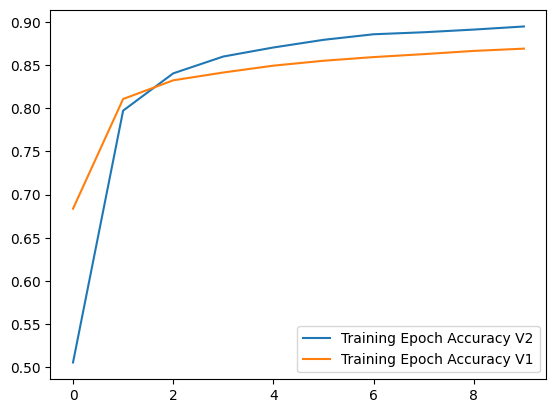

In [ ]:
plt.plot(training_epoch_acc_v2, label="Training Epoch Accuracy V2")
plt.plot(training_epoch_acc_v1, label="Training Epoch Accuracy V1")

plt.legend()
plt.show()

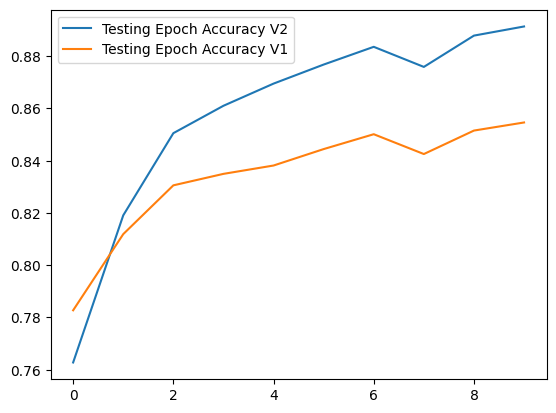

In [202]:
plt.plot(testing_epoch_acc_v2, label="Testing Epoch Accuracy V2")
plt.plot(testing_epoch_acc_v1, label="Testing Epoch Accuracy V1")

plt.legend()
plt.show()

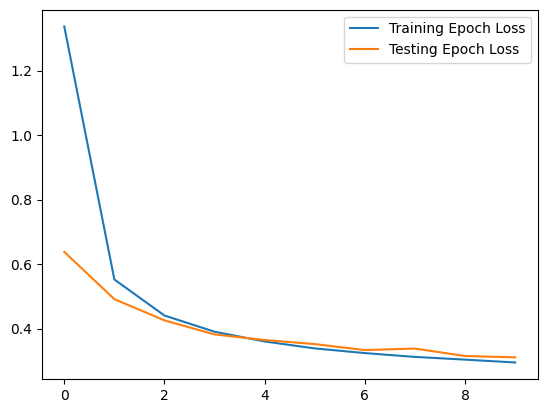

In [193]:
plt.plot([i.cpu().detach() for i in training_epoch_loss_v2], label="Training Epoch Loss")
plt.plot([i.cpu().detach() for i in testing_epoch_loss_v2], label="Testing Epoch Loss")

plt.legend()
plt.show()

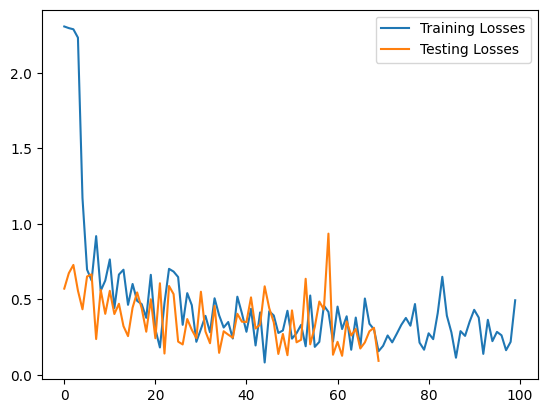

In [194]:
plt.plot(training_losses_v2, label="Training Losses")
plt.plot(test_losses_v2, label="Testing Losses")

plt.legend()
plt.show()

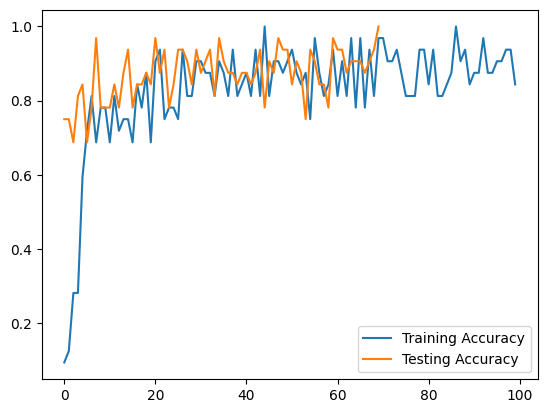

In [195]:
plt.plot(training_accuracies_v2, label="Training Accuracy")
plt.plot(test_accuracies_v2, label="Testing Accuracy")

plt.legend()
plt.show()

In [197]:
acc, acc_v1, acc_v2

(84.07547923322684, 85.47324281150159, 89.15734824281151)

In [199]:
loss, loss_v1, loss_v2

(tensor(0.4481),
 tensor(0.4041, device='mps:0'),
 tensor(0.3110, device='mps:0'))

## Results and Visualizations

In [218]:
model_v2.eval()
preds = []
actuals = []
imgs = []

with torch.inference_mode():
    for X, y in test_dataloader:
        X = X.to(device=device)
        y = y.to(device=device)

        output = model_v2(X)
        predsx = torch.argmax(torch.softmax(output, dim=1), dim=1)
        preds.append(predsx)
        actuals.append(y)
        imgs.append(X)

preds

[tensor([7, 6, 8, 9, 7, 1, 4, 8, 9, 9, 1, 7, 7, 3, 8, 0, 9, 7, 1, 4, 1, 0, 5, 7,
         9, 0, 1, 3, 0, 2, 5, 5], device='mps:0'),
 tensor([4, 0, 7, 1, 5, 1, 8, 9, 2, 7, 9, 3, 6, 5, 5, 7, 0, 4, 2, 0, 9, 4, 4, 7,
         6, 2, 1, 7, 3, 9, 6, 5], device='mps:0'),
 tensor([4, 9, 6, 2, 3, 3, 4, 4, 9, 8, 8, 4, 5, 8, 7, 7, 0, 3, 2, 6, 9, 5, 3, 1,
         8, 8, 7, 3, 5, 7, 3, 3], device='mps:0'),
 tensor([6, 2, 9, 4, 1, 8, 1, 7, 7, 2, 9, 2, 1, 4, 9, 4, 7, 6, 2, 9, 0, 2, 9, 7,
         8, 9, 2, 3, 4, 9, 4, 4], device='mps:0'),
 tensor([0, 8, 6, 1, 6, 8, 9, 3, 9, 5, 8, 9, 5, 0, 1, 4, 4, 8, 7, 6, 4, 3, 4, 6,
         9, 1, 0, 8, 8, 6, 4, 1], device='mps:0'),
 tensor([7, 4, 8, 3, 3, 6, 7, 2, 1, 0, 9, 1, 4, 3, 3, 9, 5, 7, 0, 6, 6, 8, 5, 9,
         3, 1, 4, 7, 7, 1, 8, 4], device='mps:0'),
 tensor([8, 8, 9, 6, 0, 2, 0, 1, 1, 7, 3, 1, 1, 7, 4, 7, 4, 3, 6, 3, 8, 8, 6, 7,
         5, 0, 8, 8, 8, 2, 7, 8], device='mps:0'),
 tensor([4, 4, 3, 0, 9, 1, 1, 4, 5, 7, 0, 5, 6, 8, 5, 3, 1, 0, 6, 7, 7, 7, 9

In [219]:
preds[0], actuals[0], imgs[0].shape

(tensor([7, 6, 8, 9, 7, 1, 4, 8, 9, 9, 1, 7, 7, 3, 8, 0, 9, 7, 1, 4, 1, 0, 5, 7,
         9, 0, 1, 3, 0, 2, 5, 5], device='mps:0'),
 tensor([7, 6, 8, 9, 7, 1, 4, 8, 9, 9, 1, 7, 7, 3, 8, 0, 9, 7, 1, 4, 1, 0, 5, 7,
         9, 0, 1, 3, 0, 4, 5, 5], device='mps:0'),
 torch.Size([32, 1, 28, 28]))

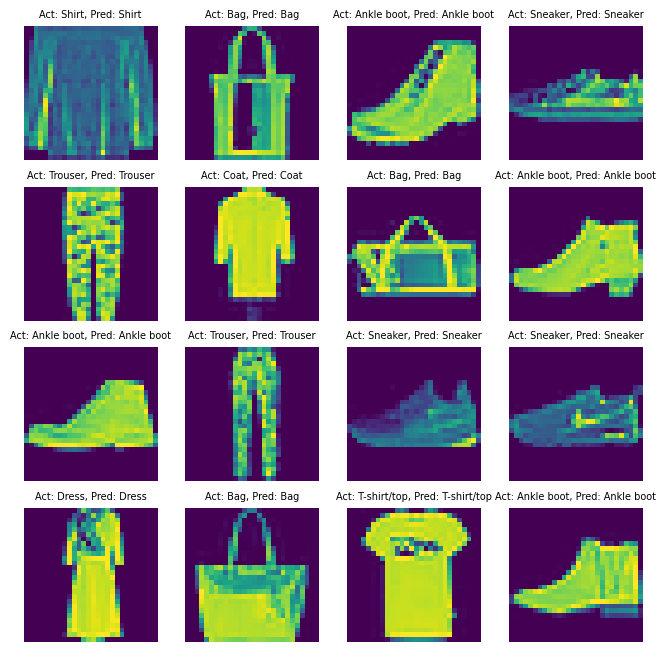

In [247]:
fig = plt.figure(figsize=(8, 8))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    data, label = imgs[0][i].cpu(), actuals[0][i].cpu()
    pred = train_data.classes[preds[0][i].cpu().item()]
    plt.imshow(data.squeeze())
    plt.title(f"Act: {test_data.classes[label]}, Pred: {pred}", fontsize=7)
    plt.axis(False)

In [251]:
predictions = [i for lst in preds for i in lst.cpu()]
truths = [i for lst in actuals for i in lst.cpu()]

len(predictions), len(truths)

(10000, 10000)

In [252]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(truths, predictions)
print(cm)

[[817   0  18  32   7   1 117   0   8   0]
 [  0 967   0  26   4   0   1   0   2   0]
 [  9   1 829  11  85   0  61   1   3   0]
 [  5   4  15 921  23   0  31   0   1   0]
 [  2   0  67  34 831   0  62   0   4   0]
 [  0   0   0   0   0 971   0  21   0   8]
 [111   0  66  33  89   2 684   0  15   0]
 [  0   0   0   0   0  14   0 975   0  11]
 [  3   1   5   4   6   4   5   6 966   0]
 [  0   0   0   0   0   6   1  39   0 954]]


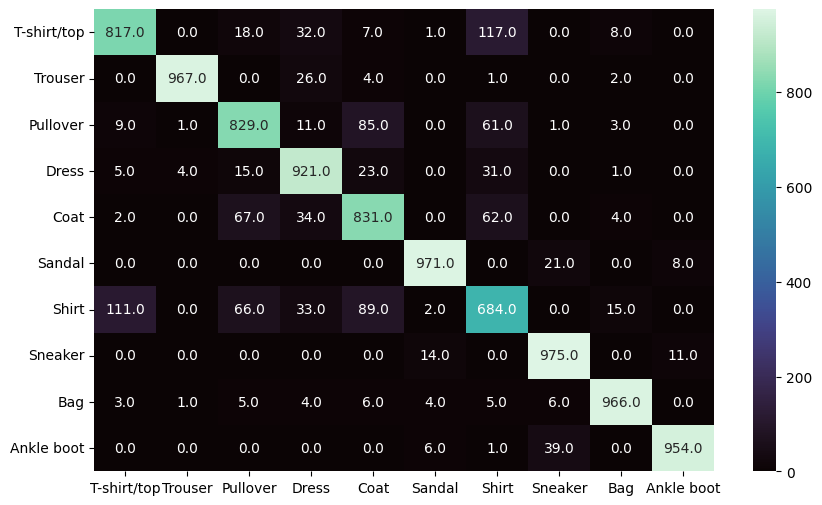

In [275]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='.1f', cmap='mako', xticklabels=train_data.classes, yticklabels=train_data.classes)

plt.show()

## Saving the model

In [276]:
torch.save(model_v2.state_dict(), "models/cnn_fashion_mnist.pth")